# Documentation

* Name: Paula Toledano Cabrera
* Library: Seaborn
* URL: https://seaborn.pydata.org
* Description: This library is a Python data visualization library. It builds on top of matplotlib and integrates closely with pandas data structures. It provides a high-level interface for drawing attractive and informative statistical graphics. Explore, understand, and present your data.

    * Key Features
        * Built-in themes and styling options for aesthetic visualizations.
        * Statistical plotting functions for visualizing relationships and distributions.
        * Fitting in and visualizing linear regression models.
        * Plotting statistical time series data.
        * Integration with Pandas data structures for seamless data handling.

# Tutorial

### Installing Seaborn

In [5]:
# First, make sure you have Seaborn isnstalled. You can install this library using pip.

In [ ]:
pip install seaborn

### Importing Seaborn

In [6]:
# Import Seaborn and other necessary libraries in your python script or Jupyter notebook.

In [173]:
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### Set the Theme

There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks. They are each suited to different applications and personal preferences. The default theme is darkgrid.

In [113]:
sns.set_theme(style = 'whitegrid')

### Data Structures 

* Long-form data
    * Each variable is a column
    * Each observation is a row
    

* Wide-form data
    * Columns and rows contain levels of different variables

In [103]:
# Long-form data example
flights = sns.load_dataset("flights")
flights.head(20)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


This dataset records the number of airline passengers who flew in each month from 1949 to 1960. 
This dataset has three variables (year, month, and number of passengers)

In [104]:
# Wide-form data example
flights_wide = flights.pivot(index = "year", columns = "month", values = "passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


Here we have the same three variables, but they are organized differently. The variables in this dataset are linked to the dimensions of the table, rather than to named fields. We can't access variables in the dataset by their name.

### Visualizing Statistical Relationships

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables.

In [119]:
# Generate random data with numpy and store it into a pandas data frame
np.random.seed(0) 
data = pd.DataFrame({'X': np.random.randn(100), 'Y': np.random.randn(100)})
data.head()

,X,Y
0,1.764052,1.883151
1,0.400157,-1.347759
2,0.978738,-1.270485
3,2.240893,0.969397
4,1.867558,-1.173123


* Scatter plots
    * relplot( ) function (with kind="scatter"; the default)

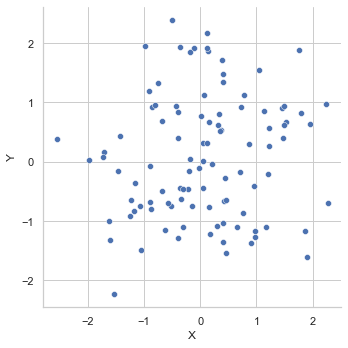

In [114]:
sns.relplot(data = data, x = 'X', y = 'Y');

* Line plots
    * relplot( ) function (with kind="line")

In [133]:
sales = pd.DataFrame({
    'Year': [2019, 2020, 2021, 2022, 2023],
    'Sales': [120, 80, 100, 130, 180]
})

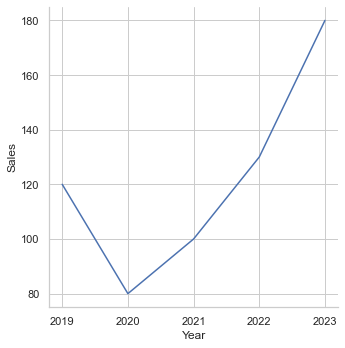

In [134]:
sns.relplot(data = sales, x = 'Year', y = 'Sales', kind = "line");

### Visualizing Distributions of Data

The distributions module contains several functions designed to understand how the variables are distributed. The axes-level functions are histplot( ), kdeplot( ), ecdfplot( ), and rugplot( ). They are grouped together within the figure-level displot( ), jointplot( ), and pairplot( ) functions.

* Histogram

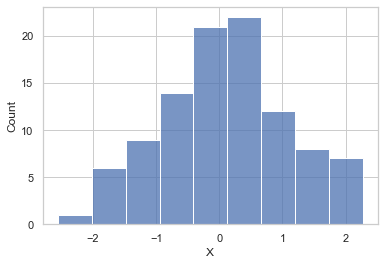

In [136]:
sns.histplot(data, x = 'X');

* Kernel density estimation
    *  Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate.

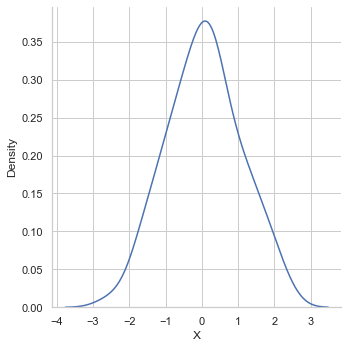

In [137]:
sns.displot(data, x = 'X', kind = "kde");

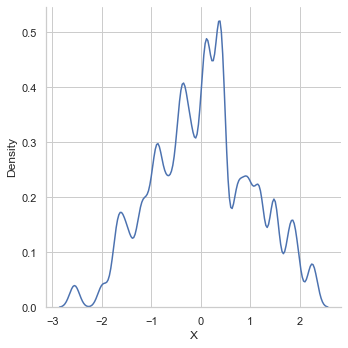

In [139]:
# Adjust the smoothing bandwidth 
# An over-smoothed estimate might erase meaningful features
# An under-smoothed estimate can obscure the true shape within random noise
sns.displot(data, x = 'X', kind = "kde", bw_adjust = .25);

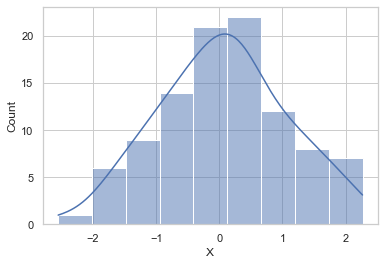

In [140]:
sns.histplot(data = data, x = 'X', kde=True);

* Empirical cumulative distributions
    * This plot draws a monotonically-increasing curve through each datapoint such that the height of the curve reflects the proportion of observations with a smaller value.

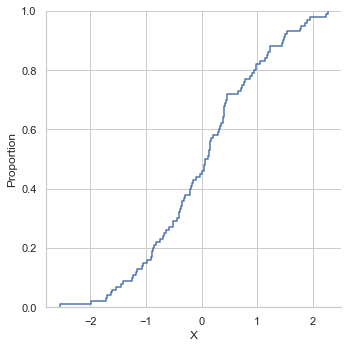

In [141]:
sns.displot(data, x = 'X', kind = "ecdf");

* Bivariate distributions
    * Heatmap

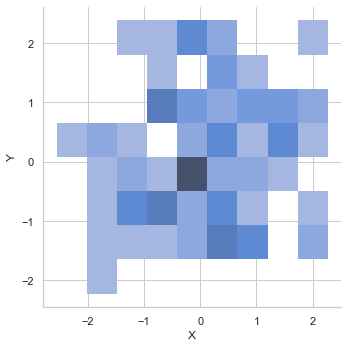

In [143]:
sns.displot(data, x = "X", y = "Y");

### Visualizing Categorical Data

There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface, catplot(), that gives unified higher-level access to them.

In [146]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


* Categorical scatterplots: all of the points belonging to one category would fall on the same position along the axis corresponding to the categorical variable.
    * stripplot() (with kind="strip"; the default)
    * swarmplot() (with kind="swarm")
        * Adjusts the points along the categorical axis using an algorithm that prevents them from overlapping. 

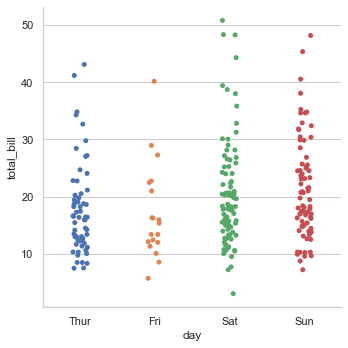

In [147]:
sns.catplot(data = tips, x = "day", y = "total_bill");

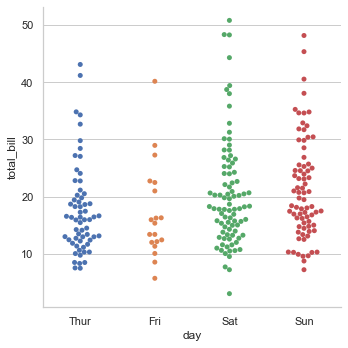

In [149]:
sns.catplot(data = tips, x = "day", y = "total_bill", kind = "swarm");

* Categorical distribution plots:
    * boxplot() (with kind="box")
    * violinplot() (with kind="violin")
        * Combines a boxplot with the kernel density estimation procedure 
    * boxenplot() (with kind="boxen")
        *  Plot that is similar to a box plot but optimized for showing more information about the shape of the distribution. 

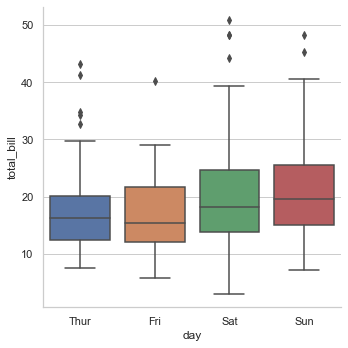

In [150]:
sns.catplot(data = tips, x = "day", y = "total_bill", kind = "box");

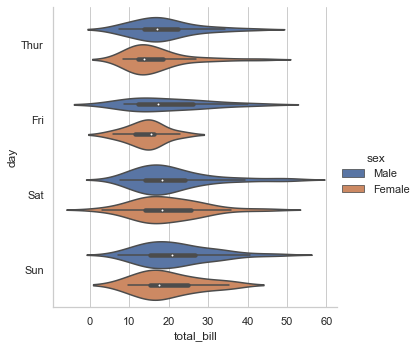

In [151]:
sns.catplot(
    data = tips, x = "total_bill", y = "day", hue = "sex", kind = "violin",
);

* Categorical estimate plots:
    * pointplot() (with kind="point")
    * barplot() (with kind="bar")
    * countplot() (with kind="count")

### Estimating Regression Fits

The two functions that can be used to visualize a linear fit are regplot() and lmplot(). lmplot() has data as a required parameter and the x and y variables must be specified as strings. Only lmplot() has hue as a parameter.

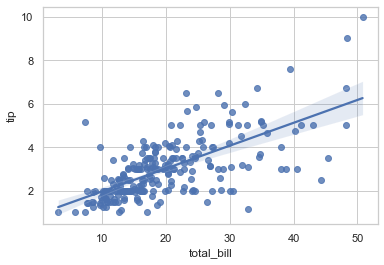

In [155]:
sns.regplot(x = "total_bill", y = "tip", data = tips);

### Structured Multiplot Grids

The FacetGrid class is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset. A FacetGrid can be drawn with up to three dimensions: row, col, and hue.

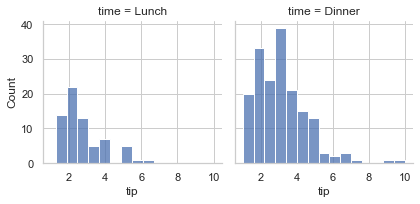

In [157]:
g = sns.FacetGrid(tips, col = "time")
g.map(sns.histplot, "tip");

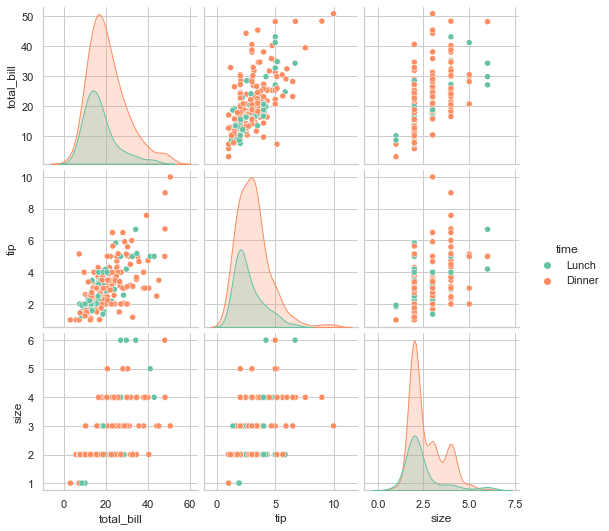

In [159]:
g = sns.pairplot(tips, hue = "time", palette = "Set2", diag_kind = "kde", height = 2.5)

### Choosing Color Palettes

Seaborn has six variations of matplotlib’s palette, called deep, muted, pastel, bright, dark, and colorblind. These span a range of average luminance and saturation values.

In [160]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

## Example using the homes dataset

In [105]:
homes = pd.read_csv('homes.csv')
homes.head()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


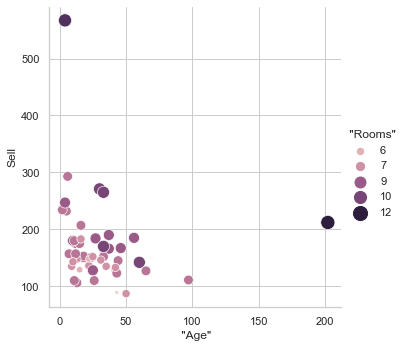

In [165]:
sns.relplot(
    data = homes,
    x = ' "Age"', y = 'Sell', hue = ' "Rooms"', size = ' "Rooms"', sizes = (15, 200));

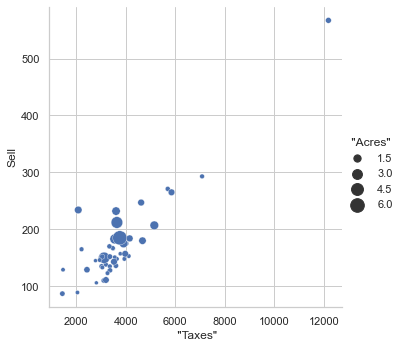

In [167]:
sns.relplot(data = homes, x = ' "Taxes"', y = 'Sell', size = ' "Acres"', sizes = (15, 200));

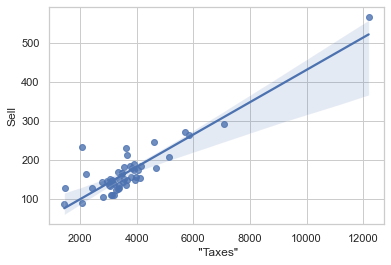

In [164]:
sns.regplot(x = ' "Taxes"', y = 'Sell', data = homes);

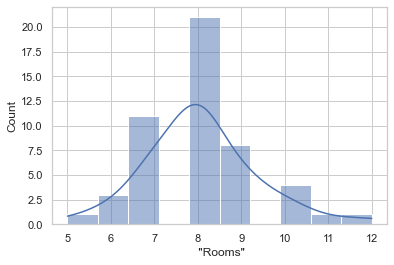

In [161]:
sns.histplot(homes, x = ' "Rooms"', bins = 10, kde = True);

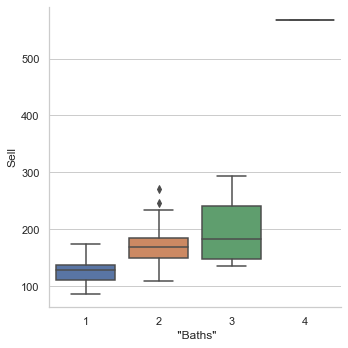

In [170]:
sns.catplot(data = homes, x = ' "Baths"', y = "Sell", kind = "box");